In [103]:
from urllib.request import urlopen, Request

In [104]:
from bs4 import BeautifulSoup

In [105]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [106]:
import pandas as pd

In [107]:
import matplotlib.pyplot as plt

#### Part 1: Getting article data

In [108]:
finviz_url = 'https://finviz.com/quote.ashx?t='

In [109]:
# Tesla, FB Meta, Pfizer
tickers = ['TSLA','FB','PFE']
news_tables = {}

In [110]:
for ticker in tickers:
    url = finviz_url + ticker
    
    req = Request(url = url, headers = {'user-agent': 'my-app'})
    response = urlopen(req)
    
    html = BeautifulSoup(response, 'html')
    news_table = html.find(id = 'news-table')
    news_tables[ticker] = news_table

#### Part 2: Parsing and manipulating data

In [111]:
parsed_data = []

In [112]:
for ticker, news_table in news_tables.items():

    for row in news_table.findAll('tr'):

        title = row.a.text
        date_data = row.td.text.split(' ')

        if len(date_data) == 1:
            time = date_data[0]
        else:
            date = date_data[0]
            time = date_data[1]

        parsed_data.append([ticker, date, time, title])

#### Part 3: Getting sentiment analysis

In [113]:
df = pd.DataFrame(parsed_data, columns = ['ticker','date','time','title'])

In [114]:
vader = SentimentIntensityAnalyzer()

In [115]:
f = lambda title: vader.polarity_scores(title)['compound']
df['compound'] = df['title'].apply(f)

In [116]:
df['date'] = pd.to_datetime(df.date).dt.date

#### Part 4: Visulization of sentiment analysis

In [117]:
plt.figure(figsize = (10,8))

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

In [118]:
mean_df = df.groupby(['ticker','date']).mean()
mean_df = mean_df.unstack()
mean_df = mean_df.xs('compound', axis = 'columns').transpose() #Get rid of the extra label of compound
print(mean_df)

ticker            FB       PFE      TSLA
date                                    
2021-12-08 -0.053638       NaN       NaN
2021-12-09  0.071872       NaN       NaN
2021-12-10  0.009150  0.073841  0.085533
2021-12-11  0.109856  0.039775  0.158477
2021-12-12  0.419550  0.383880  0.214233
2021-12-13  0.130729  0.045006  0.032524
2021-12-14  0.127740  0.018000  0.163903


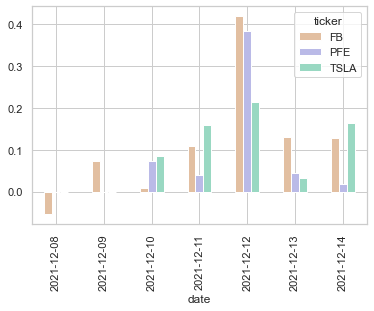

In [121]:
mean_df.plot(kind='bar',color=["#e2bfa1","#babae7","#99d8c2"])
plt.show()